# Cat Classifier using Deep learning

Using deep learning concepts to identify whether there's a cat in a picture or not

In [1]:
#importing libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from helper_function import *
from test_your_own import test_your_own
from final_model import L_layer_model

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
#loading and processing data
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [3]:
# Defining hyperparameters and other constants
n_x = 12288     # num_pixel * num_pixel * 3
layers_dims = [12288, 20, 7, 5, 1] 
learning_rate = 0.0075

## Training model

In [4]:
costs = []                                 # keep track of cost
num_iterations = 2500
print_cost = True

# Parameters initialization.
parameters = initialize_parameters_deep(layers_dims)
    
# Loop (gradient descent)
for i in range(0, num_iterations):

    # Forward propagation: [LINEAR -> RELU]*(3) -> LINEAR -> SIGMOID.
    AL, caches = L_model_forward(train_x, parameters)
        
    # Compute cost.
    cost = compute_cost(AL, train_y)
    
    # Backward propagation.
    grads = L_model_backward(AL, train_y, caches)

    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)

    # Print the cost every 100 iterations
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
        print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == num_iterations:
        costs.append(cost)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.39174697434805356
Cost after iteration 1000: 0.31518698886006163
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268134
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463302
Cost after iteration 1500: 0.16118854665827748
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005215
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.10783928

In [5]:
# parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [7]:
#predicting train and test accuracy
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.9856459330143539
Accuracy: 0.8


### Therefore our train accuracy is found to be 98% whereas the test accuracy is 80%

Accuracy: 1.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


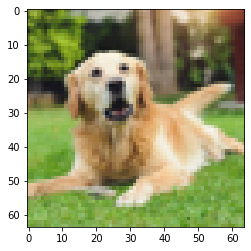

In [11]:
# #To test your own image 

my_image = "images/dog" + ".jpg"        # change this to the name of your image file 
my_label_y = [0]                 # the true class of your image (1 -> cat, 0 -> non-cat)


fname = my_image
image = np.array(Image.open(fname).resize((64, 64)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)

print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

#### This is the accuracy found without using regularization therefore you can see that the train accuracy is 98% whereas the test accuracy is still 80%